In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")

In [13]:
#In the graph above, you see a straight line. 
#eing linear means straight line or having a degree of one in the algebraic equation. 
#We can also make a linear equation with more than one input variable. 
#It is called multiple linear regression. It is of the form:

#y=m1x1 + m2x2 + m3x3 + m4x4 +........

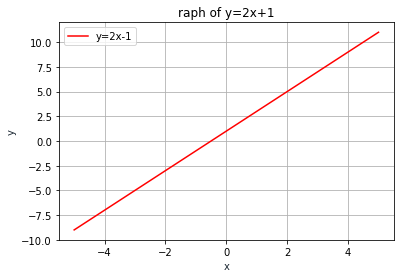

In [15]:
x=np.linspace(-5,5, 10)
y=2*x+1
plt.plot(x,y , '-r', label= 'y=2x-1')
plt.title('raph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [18]:
df_kc_house= pd.read_csv("kc_house_data.csv")
df_kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df_kc_house.columns.array

<PandasArray>
[           'id',          'date',         'price',      'bedrooms',
     'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
    'waterfront',          'view',     'condition',         'grade',
    'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
       'zipcode',           'lat',          'long', 'sqft_living15',
    'sqft_lot15']
Length: 21, dtype: object

In [24]:
df_kc_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
print("The max price of house is: {}".format(df_kc_house['price'].max()))
print("The min price of house is : {}".format(df_kc_house['price'].max()))
print("The mean price of house is : {}".format(kc_house_df['price'].mean()))
print("The median price of house is : {}".format(kc_house_df['price'].median()))

The max price of house is: 7700000.0
The min price of house is : 7700000.0
The mean price of house is : 540088.1417665294
The median price of house is : 450000.0


In [28]:
print("year built:", df_kc_house['yr_built'].max())
print("year built newly :", df_kc_house['yr_built'].min())

year built: 2015
year built newly : 1900


In [29]:
df_kc_house['age']= 2015-df_kc_house['yr_built']

In [30]:
print(df_kc_house['yr_renovated'].value_counts())
print("min",df_kc_house['yr_renovated'].min())
print("max", df_kc_house['yr_renovated'].max())

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64
min 0
max 2015


In [31]:
df_kc_house['renovation '] = 2015-df_kc_house['yr_renovated']

In [34]:
df_kc_house.drop(columns= ['id','date','yr_built', 'yr_renovated'], inplace= True)
df_kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovation
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.994864,1930.597742
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411,401.679240
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,2015.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,2015.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,2015.000000


In [36]:
df_kc_house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovation
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.054012,-0.126434
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.154178,-0.018841
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.506019,-0.050739
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.318049,-0.055363
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.053080,-0.007644
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.489319,-0.006338
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.026161,-0.092885
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.006157,-0.078400,0.280439,0.072575,0.053440,-0.103917
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.361417,0.060618
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.446963,-0.014414


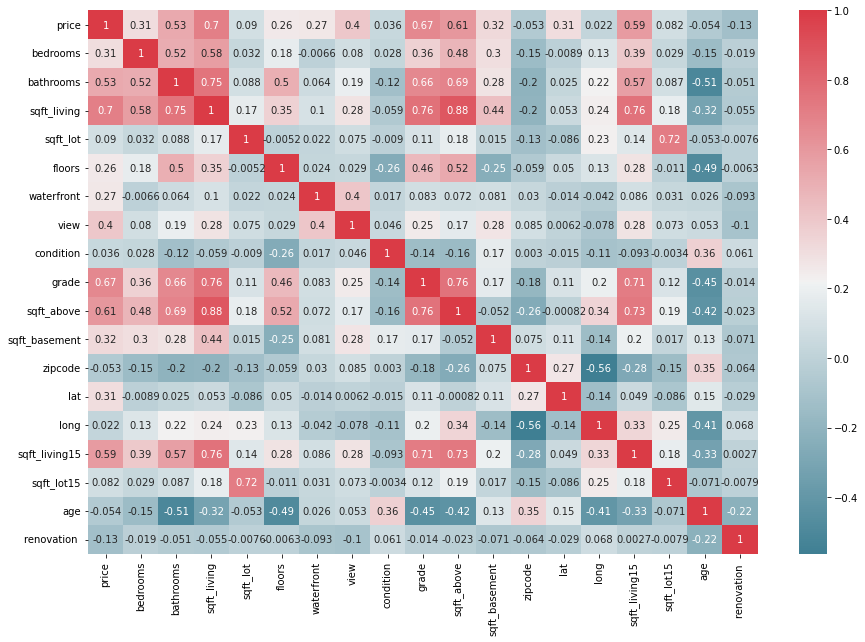

In [42]:
def correlation_heatmap(df1):
    _, a= plt.subplots(figsize=(15 ,10))
    colormap=sns.diverging_palette(220, 10 , as_cmap = True)
    sns.heatmap(df_kc_house.corr() , annot = True , cmap=colormap)
    
correlation_heatmap(df_kc_house)

In [43]:
#Visulaizing continous data on pairplot

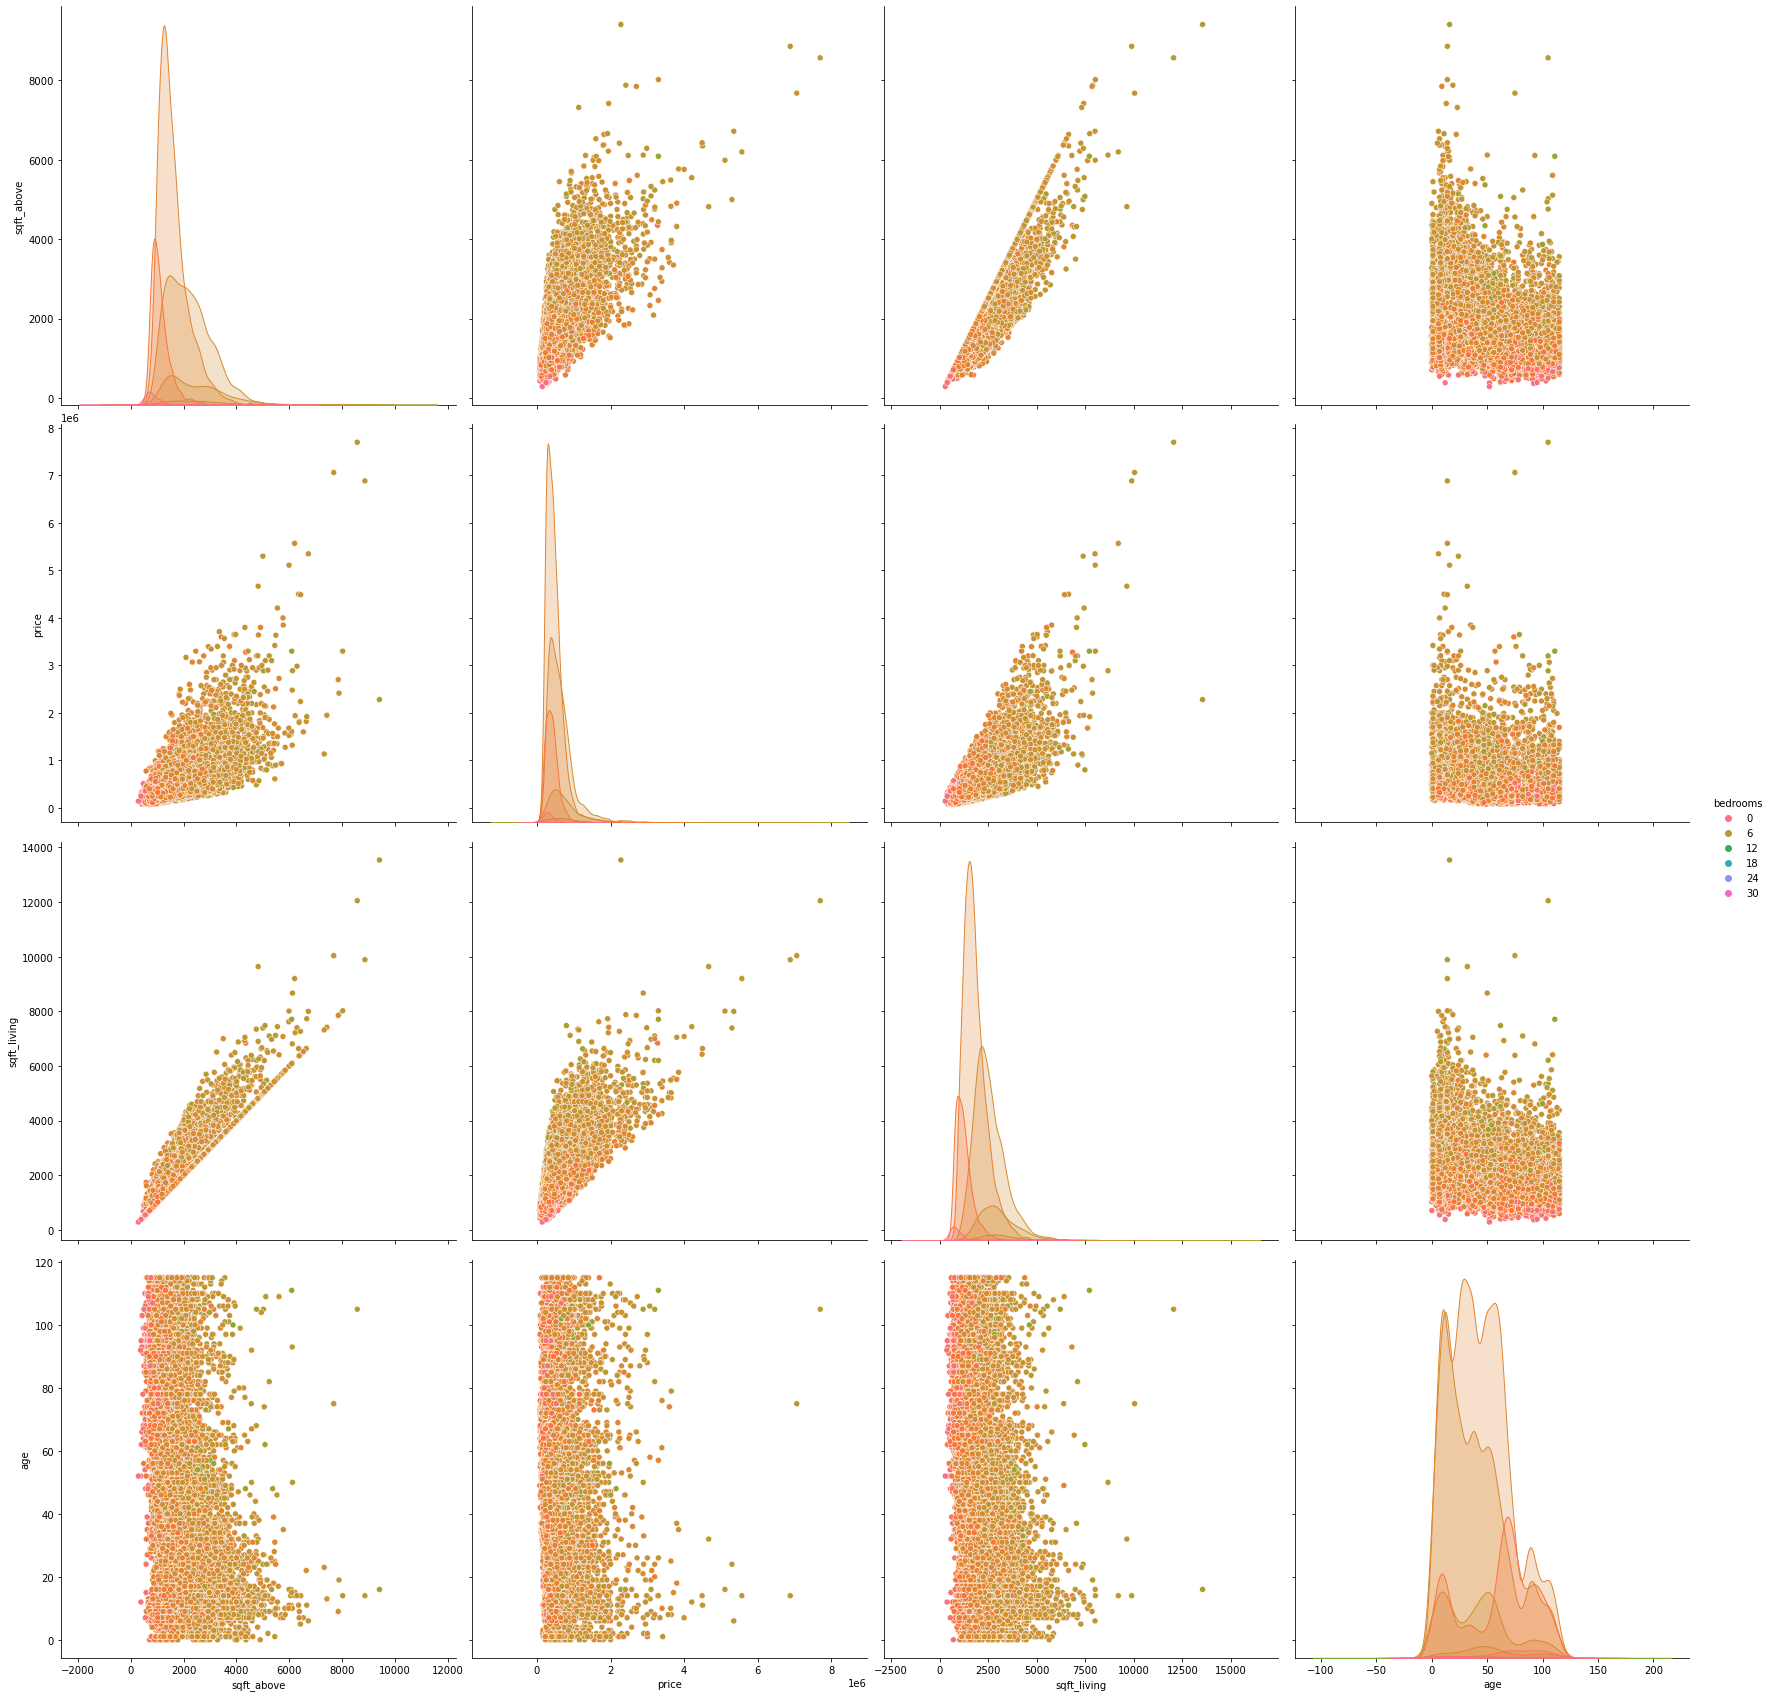

In [45]:
a = sns.pairplot(df_kc_house[['sqft_above','price', 'sqft_living', 'bedrooms',
                             'age']],
                hue = 'bedrooms', palette = 'husl', height = 6,)
    

[Text(0.5, 0, 'grade'), Text(0, 0.5, 'Price')]

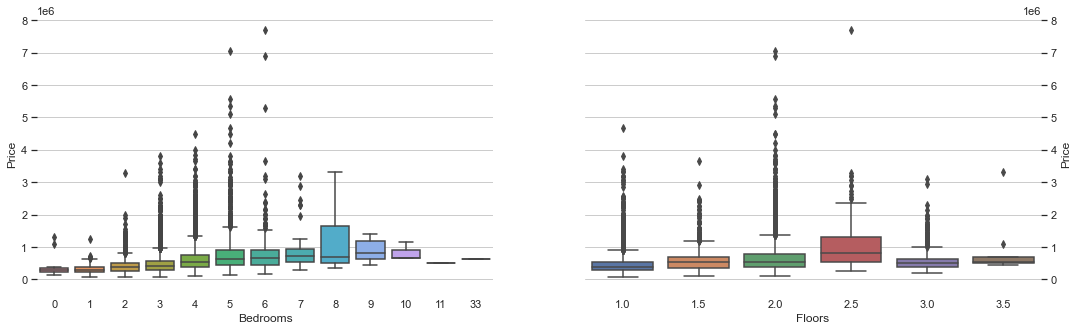

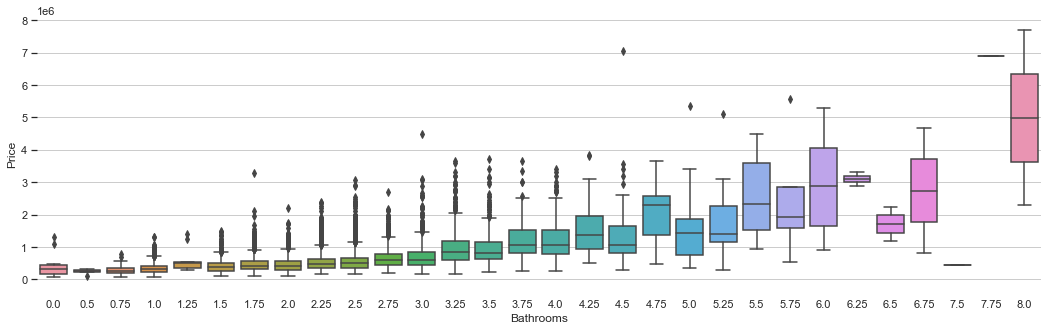

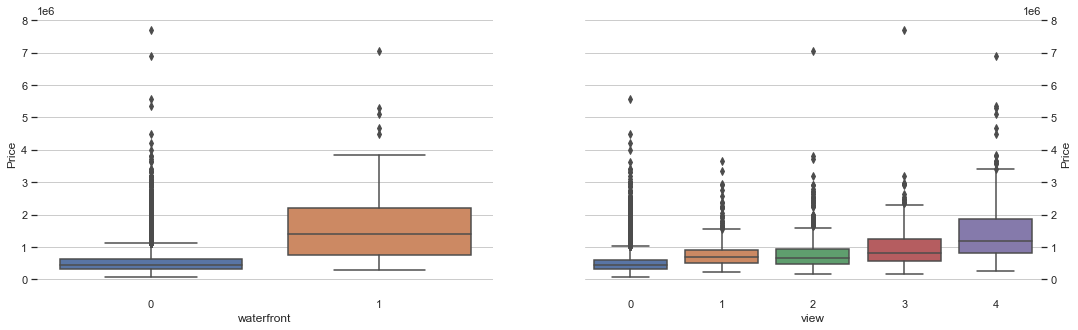

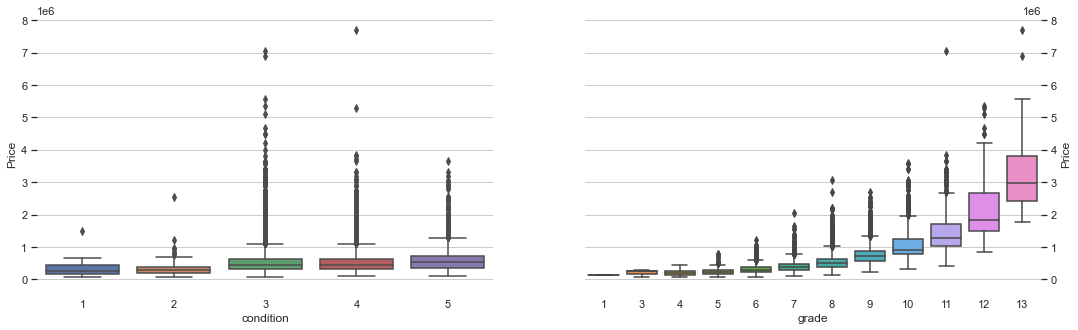

In [49]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(18,5))
sns.boxplot(x=df_kc_house['bedrooms'],y=df_kc_house['price'], ax=axes[0])
sns.boxplot(x=df_kc_house['floors'],y=df_kc_house['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df_kc_house['bathrooms'],y=df_kc_house['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price')

f, axes = plt.subplots(1, 2,figsize=(18,5))
sns.boxplot(x=df_kc_house['waterfront'],y=df_kc_house['price'], ax=axes[0])
sns.boxplot(x=df_kc_house['view'],y=df_kc_house['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='view', ylabel='Price')

f, axes = plt.subplots(1, 2,figsize=(18,5))
sns.boxplot(x=df_kc_house['condition'],y=df_kc_house['price'], ax=axes[0])
sns.boxplot(x=df_kc_house['grade'],y=df_kc_house['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='condition', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='grade', ylabel='Price')


<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

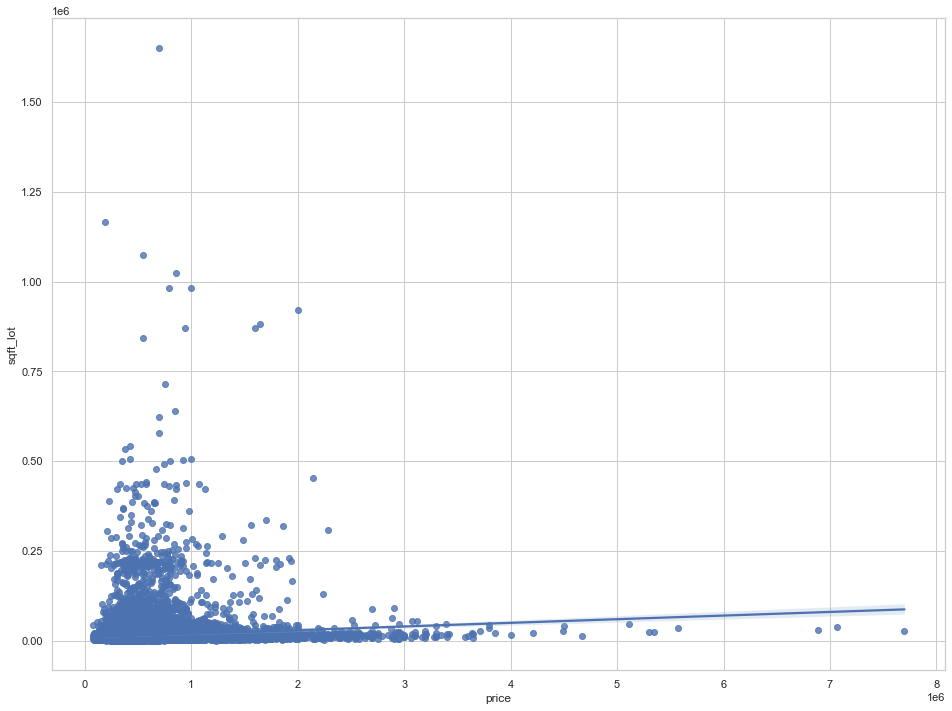

In [50]:
f, ax = plt.subplots(figsize = (16, 12))
sns.regplot(x="price", y = "sqft_lot", data= df_kc_house)

<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

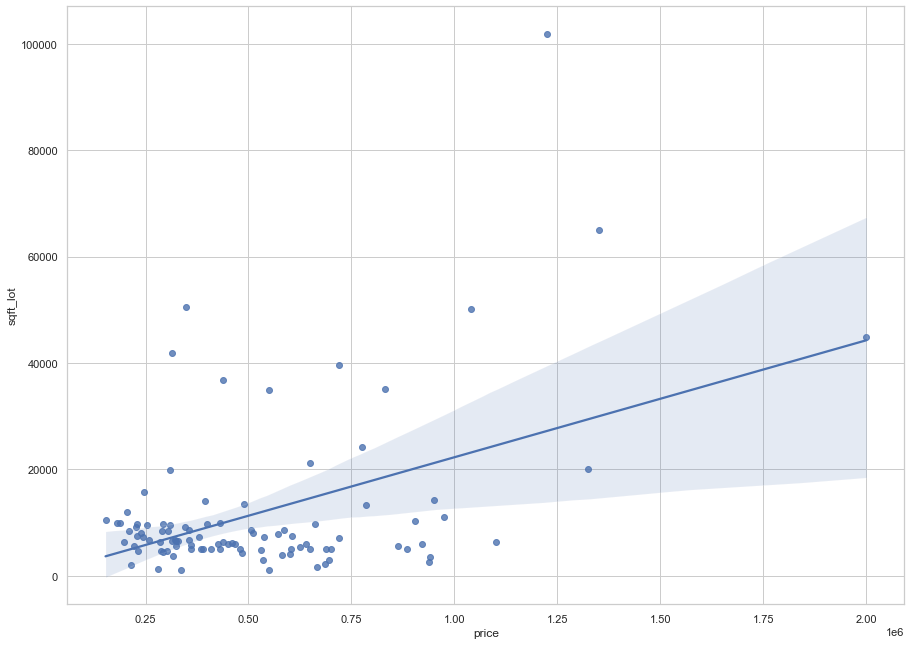

In [52]:
f, ax = plt.subplots(figsize=(15,11))
sns.regplot(x= "price", y="sqft_lot" , data = df_kc_house.iloc[:100, :])

In [56]:
feature_cols = ['sqft_living']
X = df_kc_house[feature_cols]
y=df_kc_house.price

reg = LinearRegression()

hp= reg.fit(X, y)
print(hp.intercept_)
print(hp.coef_)

-43580.74309447396
[280.6235679]


In [58]:
hp.score(X, y)

0.4928532179037931

In [59]:
#MULTIPLE LINEAR REGRESSION MODEL

In [61]:
feature_cols_one = [ 'sqft_living15', 'sqft_above', 'grade','sqft_living',
                   'bathrooms'] 
X=df_kc_house[feature_cols_one]
y=df_kc_house.price

hp1 = LinearRegression()
hp1.fit(X, y)

print(hp1.intercept_)
print(hp1.coef_)
hp1.score(X, y)

-646863.7468171899
[ 2.28200935e+01 -8.04846751e+01  1.11024920e+05  2.45420816e+02
 -3.54640227e+04]


0.544219816528976

In [62]:
feature_cols3 = ['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms','lat', 'sqft_basement', 'view' , 'waterfront', 'floors', 'bedrooms', 'age']
X = df_kc_house[feature_cols3]
y = df_kc_house.price


hp1 = LinearRegression()
hp1.fit(X, y)

print(hp1.intercept_)
print(hp1.coef_)
hp1.score(X, y)



-27215303.85823347
[ 1.71907757e+01 -1.64807076e+15  1.01991248e+05  1.64807076e+15
  4.75000612e+04  5.55996724e+05 -1.64807076e+15  5.13099283e+04
  5.95402149e+05  4.98047488e+03 -3.25722506e+04  3.03568359e+03]


0.6910034239653522

In [63]:
from sklearn.model_selection import train_test_split

train_data , test_data = train_test_split(df_kc_house, train_size=0.7, 
                                         random_state = 0)

X_train = np.array(train_data['sqft_living'], dtype= pd.Series).reshape(-1, 1)
Y_train = np.array(train_data['price'], dtype= pd.Series).reshape(-1,1)

X_test = np.array(test_data['sqft_living'], dtype = pd.Series).reshape(-1,1)
Y_test = np.array(test_data['price'], dtype= pd.Series).reshape(-1,1)

reg.fit(X_train , Y_train)

LinearRegression()

In [64]:
LinearRegression()
print(reg.coef_, reg.intercept_)

[[278.32860644]] [-37893.59850107]
